# Phase 1 Code Challenge Review 


TOPICS TO BE COVERED:
- Pandas Operations
- Data Visualization
- Statistics
- Python Data Structure

#### 1. Pandas Operations

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
# import data from a file 
df = sns.load_dataset('iris')

# what if this file is in a directory?

#df2 = pd.read_csv('auto-mpg.csv')

In [3]:
# examine the first few elements of it
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:

# examine the dimensions of it
df.shape

(150, 5)

In [5]:
# check to see if you have missing values
df.isnull().sum(axis = 0) #axis = 0 counts the number of null in the row by column while axis=1 would return the nulls in the columns by row

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
# introduce some missing values
df.iloc[2:10,1:3] = np.nan #this is saysing for row 2 thru 9 (index 2-10 stopping before 10) and columns 1 thru 3 (index 1 stopping before 3 so 2) insert the given value which here is a null value

In [78]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
0,5.1,3.5,1.4,0.2,setosa,51.0,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0,49.0
10,5.4,3.7,1.5,0.2,setosa,54.0,54.0
11,4.8,3.4,1.6,0.2,setosa,48.0,48.0
12,4.8,3.0,1.4,0.1,setosa,48.0,48.0
13,4.3,3.0,1.1,0.1,setosa,43.0,43.0
14,5.8,4.0,1.2,0.2,setosa,58.0,58.0
15,5.7,4.4,1.5,0.4,setosa,57.0,57.0
16,5.4,3.9,1.3,0.4,setosa,54.0,54.0
17,5.1,3.5,1.4,0.3,setosa,51.0,51.0


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     8
petal_length    8
petal_width     0
species         0
dtype: int64

In [8]:
df.shape   

(150, 5)

In [9]:
# drop them by certain columns
df.dropna(subset = ['sepal_width'], axis = 0, inplace = True)

In [10]:
df.shape   

(142, 5)

In [11]:
# convert and modify columns

# create a new column, that is 10 times the sepal length, called sepal length 10

df['sepal_length_10'] = df["sepal_length"] * 10 


In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10
0,5.1,3.5,1.4,0.2,setosa,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0
10,5.4,3.7,1.5,0.2,setosa,54.0
11,4.8,3.4,1.6,0.2,setosa,48.0
12,4.8,3.0,1.4,0.1,setosa,48.0


In [13]:
# another way?
df['sepal_length_10_lambda'] = df['sepal_length'].apply(lambda x:x*10)

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
0,5.1,3.5,1.4,0.2,setosa,51.0,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0,49.0
10,5.4,3.7,1.5,0.2,setosa,54.0,54.0
11,4.8,3.4,1.6,0.2,setosa,48.0,48.0
12,4.8,3.0,1.4,0.1,setosa,48.0,48.0


#### 2. Data Visualization

In [15]:
# how many species are there, and how many flowers are in each species
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [31]:
df.groupby(['species'])['species'].value_counts()

species     species   
setosa      setosa        42
versicolor  versicolor    50
virginica   virginica     50
Name: species, dtype: int64

# let's plot the average pedal length for each species of iris 


In [32]:
petal_length_by_sp = df.groupby(['species']).petal_length.mean()

In [33]:
flowers = petal_length_by_sp.index

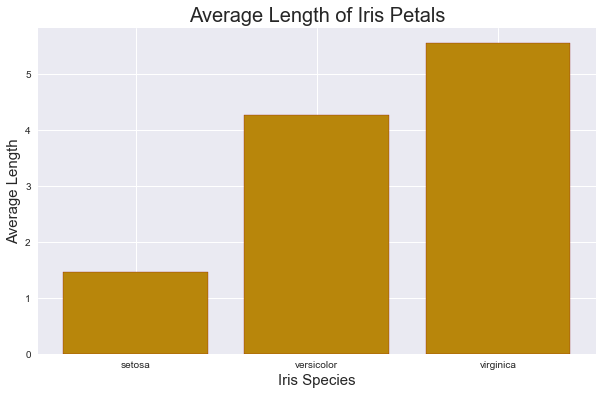

In [34]:
#plot the average petal length for each species 
fig, ax = plt.subplots(figsize=(10,6)) 

ax.bar(flowers , petal_length_by_sp, color='darkgoldenrod', edgecolor= 'darkred', align='center') 
ax.set_title('Average Length of Iris Petals', size=20)  
ax.set_xlabel('Iris Species', size=15)
ax.set_ylabel('Average Length', size=15) 
plt.show()

<BarContainer object of 4 artists>

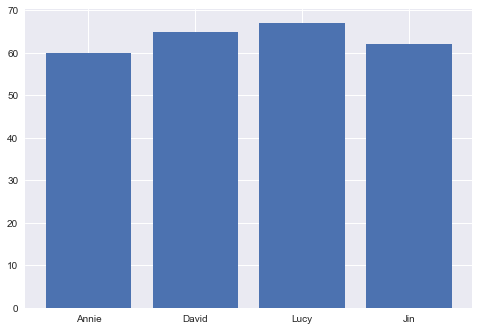

In [35]:
# your turn - create a bar chart using the following dummy data
persons = ['Annie', 'David', 'Lucy','Jin']
height = [60, 65, 67, 62]

plt.bar(persons, height)


## Create a Scatterplot of for sepal length and sepal width

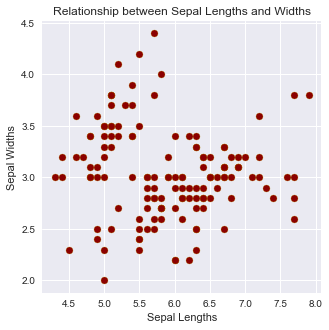

In [36]:
# scatterplot your code here 
fig, ax = plt.subplots(figsize = (5, 5))


ax.scatter(df["sepal_length"], df["sepal_width"], color='darkred', edgecolor= 'darkgoldenrod' )

ax.set_xlabel("Sepal Lengths")
ax.set_ylabel("Sepal Widths")
ax.set_title('Relationship between Sepal Lengths and Widths')


plt.show()   #??? confirm no correlation

In [37]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10,sepal_length_10_lambda
sepal_length,1.000000,-0.092449,0.861474,0.802464,1.000000,1.000000
sepal_width,-0.092449,1.000000,-0.414134,-0.349062,-0.092449,-0.092449
petal_length,0.861474,-0.414134,1.000000,0.959259,0.861474,0.861474
petal_width,0.802464,-0.349062,0.959259,1.000000,0.802464,0.802464
sepal_length_10,1.000000,-0.092449,0.861474,0.802464,1.000000,1.000000
sepal_length_10_lambda,1.000000,-0.092449,0.861474,0.802464,1.000000,1.000000


Can you describe the relationship above?

#### 3. Statistics 

In [38]:
# calculate the mean and median value for sepal length 
sepal_length_mean = df['sepal_length'].mean() 
sepal_length_mean

5.900704225352114

In [39]:
sepal_length_med = df['sepal_length'].median() 
sepal_length_med

5.8

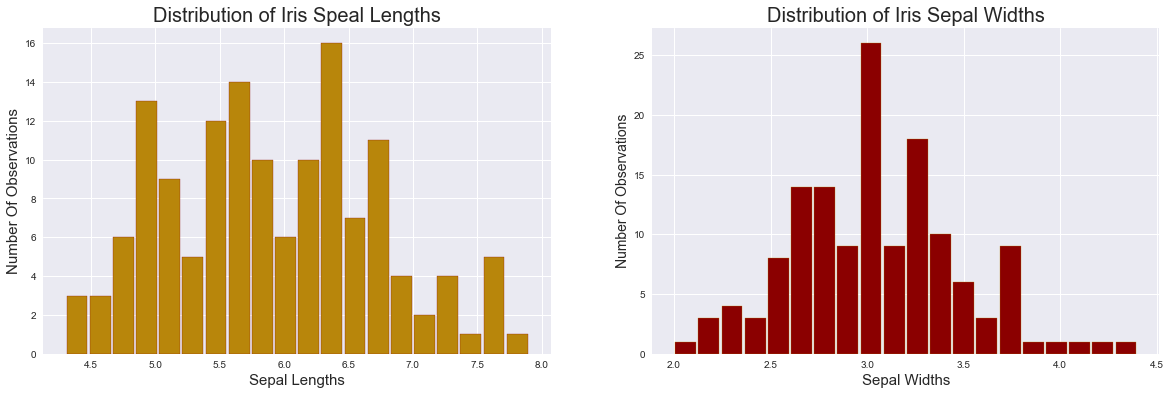

In [40]:
# what can you say about the distribution of sepal length and sepal width based on this distribution?   

fig = plt.figure(figsize=(20,6)) 

ax1 = fig.add_subplot(1,2,1)  
ax2 = fig.add_subplot(1,2,2)


ax1.hist(df['sepal_length'], bins=20, color='darkgoldenrod', rwidth = 0.9, edgecolor= 'darkred') 
ax1.set_title("Distribution of Iris Speal Lengths", size= 20) 
ax1.set_xlabel('Sepal Lengths', size=15) 
ax1.set_ylabel('Number Of Observations', size=15) 

ax2.hist(df['sepal_width'], color='darkred', bins=20, rwidth = 0.9, edgecolor= 'darkgoldenrod') 
ax2.set_title("Distribution of Iris Sepal Widths", size= 20) 
ax2.set_xlabel('Sepal Widths', size=15) 
ax2.set_ylabel('Number Of Observations', size=14)

plt.show() 

#We say that length has mutlimodal distribution while width has slightly rightskewing normal distribution.

In [41]:
# which flower has the longest petal? what is the species of that flower
df.groupby(['species']).petal_length.max()

species
setosa        1.9
versicolor    5.1
virginica     6.9
Name: petal_length, dtype: float64

In [42]:
df.sort_values(by = 'petal_length', ascending = False).head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
118,7.7,2.6,6.9,2.3,virginica,77.0,77.0


In [43]:
#use logical subset
df[df.petal_length == df.petal_length.max()]

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
118,7.7,2.6,6.9,2.3,virginica,77.0,77.0


#### 4. Python Data Structure 

In [44]:
get_money = {'get':
            [{'get':[{
                'get':'money'
            }]}]} 



Can you parse this data structure to show where the money resides?

In [45]:
# get the money 
print("Bout to get " + str(get_money['get'][0]['get'][0]['get']) + "!")

Bout to get money!


In [46]:
groomer_info = { 'pets':
    [{'Ginger': [{
        'age': 5,
        'type': 'Pitbull',
        'attribute': ['Playful','Cheery','Hyper']
    }],
    'Chloe': [{
        'age': 1,
        'type': 'Maine Coon Cat',
        'attribute': ['Alert','Independent','Playful']
    }],
    'Joe Rogan': [{
        'age': 8,
        'type': 'Parrot',
        'attribute': ['Loud','Opinionated','Annoying']
    }],
    'Rick Astley': [{
        'age': 2,
        'type': 'Labrador',
        'attributes': ['never','gives','you','up']
    }]}]
}    

In [47]:
# explore the structure of dictionary
names = list(groomer_info['pets'][0].keys()) 


In [48]:
print(names)

['Ginger', 'Chloe', 'Joe Rogan', 'Rick Astley']


In [49]:
#  create a list that contain all pets' types
# desired output ['Pitbull','Maine Coon','Parrot','Labrador']

pet_types = []

for pet in names:
    pet_types.append(groomer_info['pets'][0][pet][0]['type'])
    
pet_types

['Pitbull', 'Maine Coon Cat', 'Parrot', 'Labrador']

In [75]:
[ d['type'] for breedName,breedInfo in groomer_info['pets'][0].items() for d in breedInfo]  

#for a list comprehension 
#you put the thing your're trying to get at first  
#the main thing youre going into second. 
#and the thing you are iterating thru last  

['Pitbull', 'Maine Coon Cat', 'Parrot', 'Labrador']

In [72]:
list(groomer_info['pets'][0].items())

[('Ginger',
  [{'age': 5,
    'type': 'Pitbull',
    'attribute': ['Playful', 'Cheery', 'Hyper']}]),
 ('Chloe',
  [{'age': 1,
    'type': 'Maine Coon Cat',
    'attribute': ['Alert', 'Independent', 'Playful']}]),
 ('Joe Rogan',
  [{'age': 8,
    'type': 'Parrot',
    'attribute': ['Loud', 'Opinionated', 'Annoying']}]),
 ('Rick Astley',
  [{'age': 2,
    'type': 'Labrador',
    'attributes': ['never', 'gives', 'you', 'up']}])]

In [74]:
name_pets = [] 

for k,v in groomer_info['pets'][0].items(): 
    for d in v: 
        name_pets.append(d['type']) 

name_pets

['Pitbull', 'Maine Coon Cat', 'Parrot', 'Labrador']

In [50]:
# create a list that contain all pets age 

pet_ages = []

for pet in names:
    pet_ages.append(groomer_info['pets'][0][pet][0]['age'])
    
pet_ages

[5, 1, 8, 2]

In [76]:
# create a function that returns the names of pets who is older than x years old

# the function should take in a dictionary containing all pet information, 
# and an integer indicating age you want to compare

def pets_older_than(data, age):
    pets_older_than = []
    for creature in names: 
        if age < groomer_info['pets'][0][pet][0]['age']: 
            pets_older_than.append(creature) 
            

In [77]:
pets_older_than(groomer_info,4)
#['Ginger','Joe Rogan']

syntax of list comprehension: [expression for item in collection if xxx else xxx]
for example:
[i*2 for i in list]